In [1]:
!pip install ace_tools
!pip install category_encoders



In [10]:
!pip install --upgrade pip
!pip install tensorflow


  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\catas\anaconda3\python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)


In [11]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import loguniform, uniform
import shap
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from category_encoders import TargetEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, regularizers, optimizers, backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization, Activation, Add)
from tensorflow.keras.losses import Huber
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,
    GradientBoostingRegressor, VotingClassifier, StackingClassifier,)
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, 
    mean_absolute_error, mean_squared_error, r2_score,adjusted_rand_score, normalized_mutual_info_score, silhouette_score)
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline as SkPipeline, make_pipeline
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

## Section 1: Load dataset

Set to show all columns:

In [5]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 
pd.set_option('display.colheader_justify', 'center') 

In [7]:
df = pd.read_csv("migraine_symptom_classification.csv")
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,3,1,0,0,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [9]:
print("**"*20)
print(" "*10, 'Dataset size:')
print("**"*20)
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

****************************************
           Dataset size:
****************************************
400 rows and 24 columns


In [11]:
print("**"*20)
print(" "*10,'Dataset Information:')
print("**"*20)
df.info()

****************************************
           Dataset Information:
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 1

## Section 2: Dataset description

### 2.1) Missing and duplicated values

In [15]:
summary = pd.DataFrame(index=df.columns)

# Missing items by column
summary["Missing_count"]   = df.isna().sum()
summary ['Missing_percent'] = (summary["Missing_count"] / len(df) * 100).round(2)
 
# Duplicated items by column
summary['Duplicated_count']   = df.apply(lambda s: s.duplicated().sum())
summary['Duplicated_percent'] = ((summary["Duplicated_count"]) / len(df) * 100).round(2)

dup_rows = df.duplicated().sum()
row_summary = pd.DataFrame({
    'Missing_count': np.nan,
    'Missing_percent': np.nan,
    'Duplicated_count'  : dup_rows,      # no aplica por fila
    'Duplicated_percent': (dup_rows / len(df) * 100).round(2)
}, index=['Duplicated rows'])

summary = pd.concat([summary]).sort_index();summary

,Missing_count,Missing_percent,Duplicated_count,Duplicated_percent
Age,0,0.0,349,87.25
Ataxia,0,0.0,399,99.75
Character,0,0.0,397,99.25
Conscience,0,0.0,398,99.50
DPF,0,0.0,398,99.50
Defect,0,0.0,398,99.50
Diplopia,0,0.0,398,99.50
Duration,0,0.0,397,99.25
Dysarthria,0,0.0,398,99.50
Dysphasia,0,0.0,398,99.50


Now, we check for duplicate rows and detect six rows. This information is dropped even when it's not a significant percentage of the sample.

In [18]:
df.duplicated().sum()

6

In [20]:
df.drop_duplicates(inplace=True)
df.shape

(394, 24)

In [22]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Age': [30 50 53 45 49 27 24 23 48 51 34 20 40 56 44 46 25 38 35 17 36 31 67 22
 68 43 41 37 26 54 16 33 70 28 29 69 21 64 32 52 47 39 57 58 42 77 18 59
 55 19 15]
Unique values in column 'Duration': [1 3 2]
Unique values in column 'Frequency': [5 1 2 8 7 6 4 3]
Unique values in column 'Location': [1 2 0]
Unique values in column 'Character': [1 2 0]
Unique values in column 'Intensity': [2 3 1 0]
Unique values in column 'Nausea': [1 0]
Unique values in column 'Vomit': [0 1]
Unique values in column 'Phonophobia': [1 0]
Unique values in column 'Photophobia': [1 0]
Unique values in column 'Visual': [1 2 4 0 3]
Unique values in column 'Sensory': [2 1 0]
Unique values in column 'Dysphasia': [0 1]
Unique values in column 'Dysarthria': [0 1]
Unique values in column 'Vertigo': [0 1]
Unique values in column 'Tinnitus': [0 1]
Unique values in column 'Hypoacusis': [0 1]
Unique values in column 'Diplopia': [0 1]
Unique values in column 'Defect': [0 1]
Unique values in column

In [24]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,394.0,31.70,12.18,15.0,22.0,28.0,40.00,77.0
Duration,394.0,1.62,0.77,1.0,1.0,1.0,2.00,3.0
Frequency,394.0,2.37,1.67,1.0,1.0,2.0,3.75,8.0
Location,394.0,0.97,0.27,0.0,1.0,1.0,1.00,2.0
Character,394.0,0.98,0.28,0.0,1.0,1.0,1.00,2.0
Intensity,394.0,2.47,0.77,0.0,2.0,3.0,3.00,3.0
Nausea,394.0,0.99,0.11,0.0,1.0,1.0,1.00,1.0
Vomit,394.0,0.32,0.47,0.0,0.0,0.0,1.00,1.0
Phonophobia,394.0,0.98,0.15,0.0,1.0,1.0,1.00,1.0
Photophobia,394.0,0.98,0.14,0.0,1.0,1.0,1.00,1.0


Considering that the feature 'Ataxia' only has one value and it is zero, it is decided to eliminate this column since it does not contribute information to the set.

In [27]:
df.drop(columns=['Ataxia'], inplace=True)
df.shape

(394, 23)

### 2.2) Numeric/Categorical summary

In [32]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(exclude="number").columns.tolist()

print("Numeric columns :", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns : ['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity', 'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF']
Categorical columns: ['Type']


## Section 3: Preprocessing & Visualizations

### 3.1) Visualizations

It is important to note that the analysis focuses on seven kind of migraine diagnosed:

In [37]:
df['Type'].value_counts()

Type
Typical aura with migraine       241
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64

In [39]:
df['Type'].describe()

count                            394
unique                             7
top       Typical aura with migraine
freq                             241
Name: Type, dtype: object

In [41]:
custom_palette_migraine = {
    "Typical aura with migraine": "#FFE587",
    "Migraine without aura": "#FFCF9F",
    "Familial hemiplegic migraine": "#FFB3C1",
    "Typical aura without migraine": '#addd8e',#"#D2B2FF",
    "Basilar-type aura": "#CACDFF",
    "Other": "#E5F8B4",
    "Sporadic hemiplegic migraine": "#8EE9EA"}

C:\Users\catas\AppData\Local\Temp\ipykernel_29512\144704371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Type'], palette=custom_palette_migraine, edgecolor='black',ax=ax)


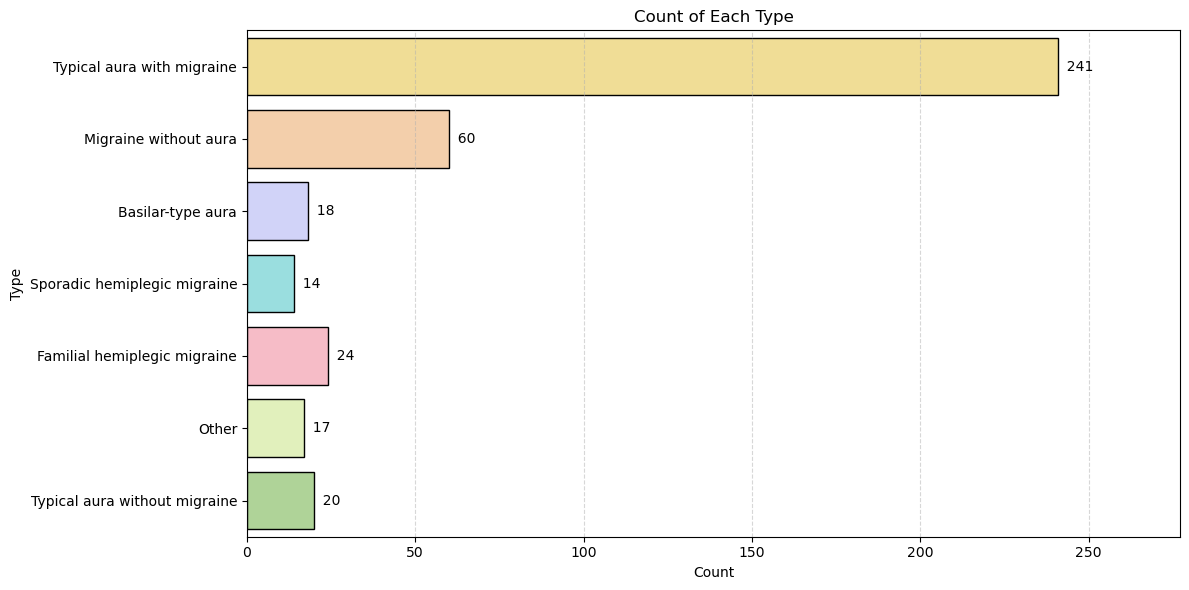

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(y=df['Type'], palette=custom_palette_migraine, edgecolor='black',ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='  %d', fontsize=10, label_type='edge')
ax.set_ylabel('Type')
ax.set_xlabel('Count')
ax.set_title('Count of Each Type')
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.tick_params(axis='y', rotation=0)
ax.set_xlim(0, df['Type'].value_counts().max() * 1.15)  
plt.tight_layout()
plt.savefig("Count_of_each_Type.png", dpi=300, bbox_inches='tight')
plt.show()

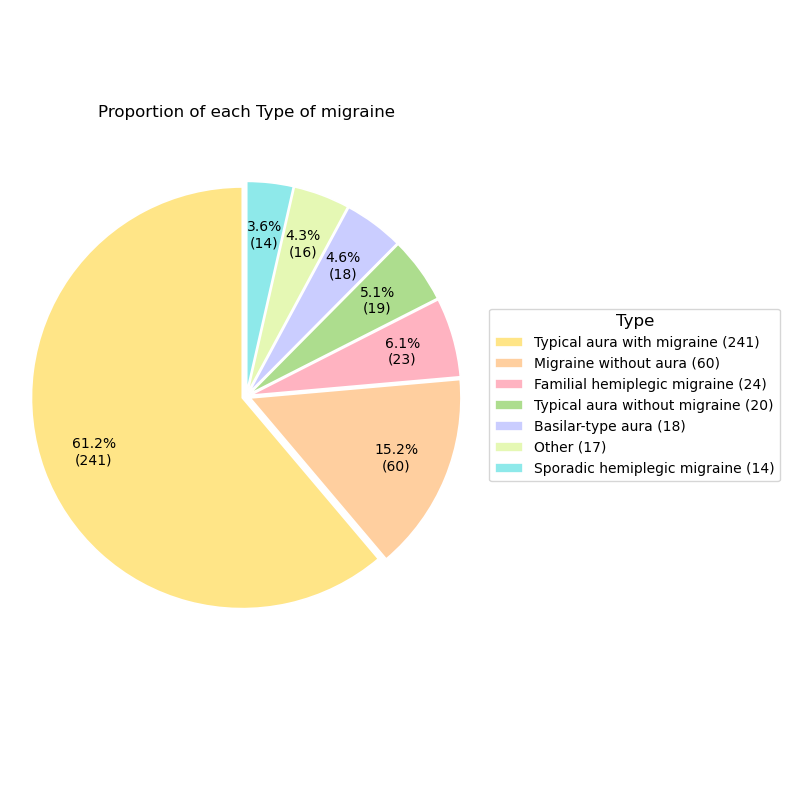

In [44]:
import textwrap

counts = df['Type'].value_counts()
labels = counts.index.tolist()
sizes  = counts.values.tolist()
colors = [custom_palette_migraine[t] for t in labels]

fig, ax = plt.subplots(figsize=(8, 8))
wedgeprops = {'edgecolor': 'white', 'linewidth': 1.2}
explode    = [0.02] * len(labels) 
wedges, texts, autotexts = ax.pie(
    sizes, explode=explode, labels=None, labeldistance=1.15, 
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*sum(sizes))})",
    startangle=90, colors=colors, wedgeprops=wedgeprops, pctdistance=0.75, textprops={'fontsize': 10})

legend_labels = [f"{lab} ({cnt})" for lab, cnt in zip(labels, sizes)]
ax.legend(wedges, legend_labels, title="Type", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)
ax.set_title("Proportion of each Type of migraine",y=0.85)
ax.axis('equal')  # asegura círculo perfecto
plt.tight_layout()
plt.savefig("Proportion_of_each_Type.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\catas\AppData\Local\Temp\ipykernel_29512\1556326675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='Age', y='Type', order=order, palette=custom_palette_migraine, edgecolor='black', linewidth=1, saturation=0.8, ax=ax)


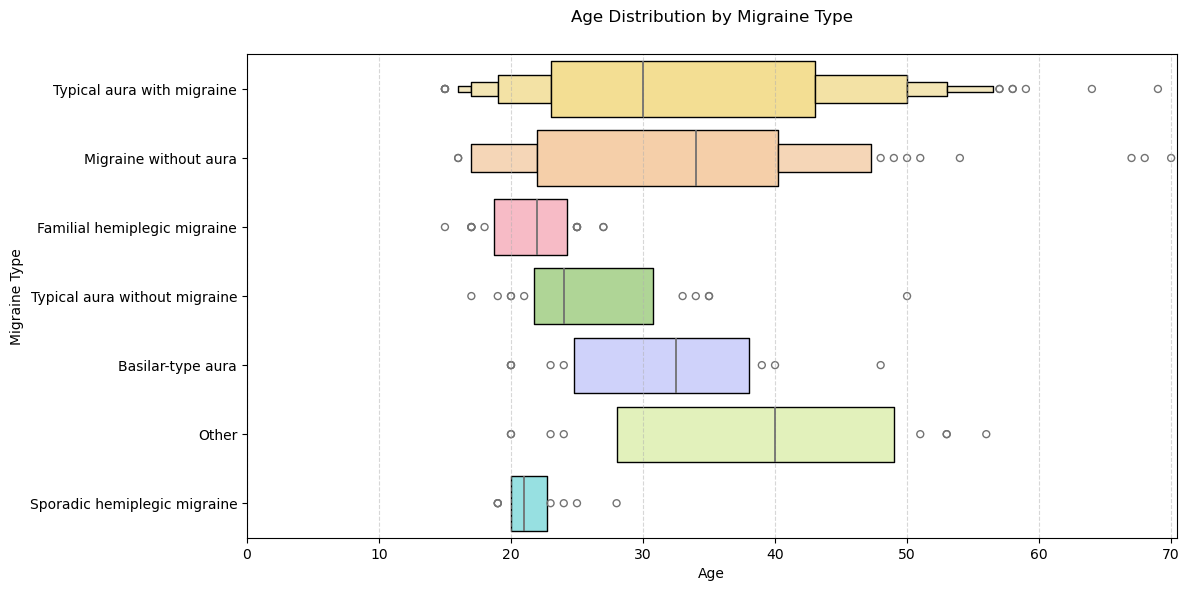

In [47]:
order = df['Type'].value_counts().index

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=df, x='Age', y='Type', order=order, palette=custom_palette_migraine, edgecolor='black', linewidth=1, saturation=0.8, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Migraine Type')
ax.set_title('Age Distribution by Migraine Type',y=1.05)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.tick_params(axis='y', rotation=0)
x99 = df['Age'].quantile(0.99)
ax.set_xlim(0, x99 * 1.05)
plt.tight_layout()
plt.savefig("Age_Distribution_by_Migraine_Type.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature],y=df['Type'],
C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature],y=df['Type'],
C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature],y=df['Type'],
C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue

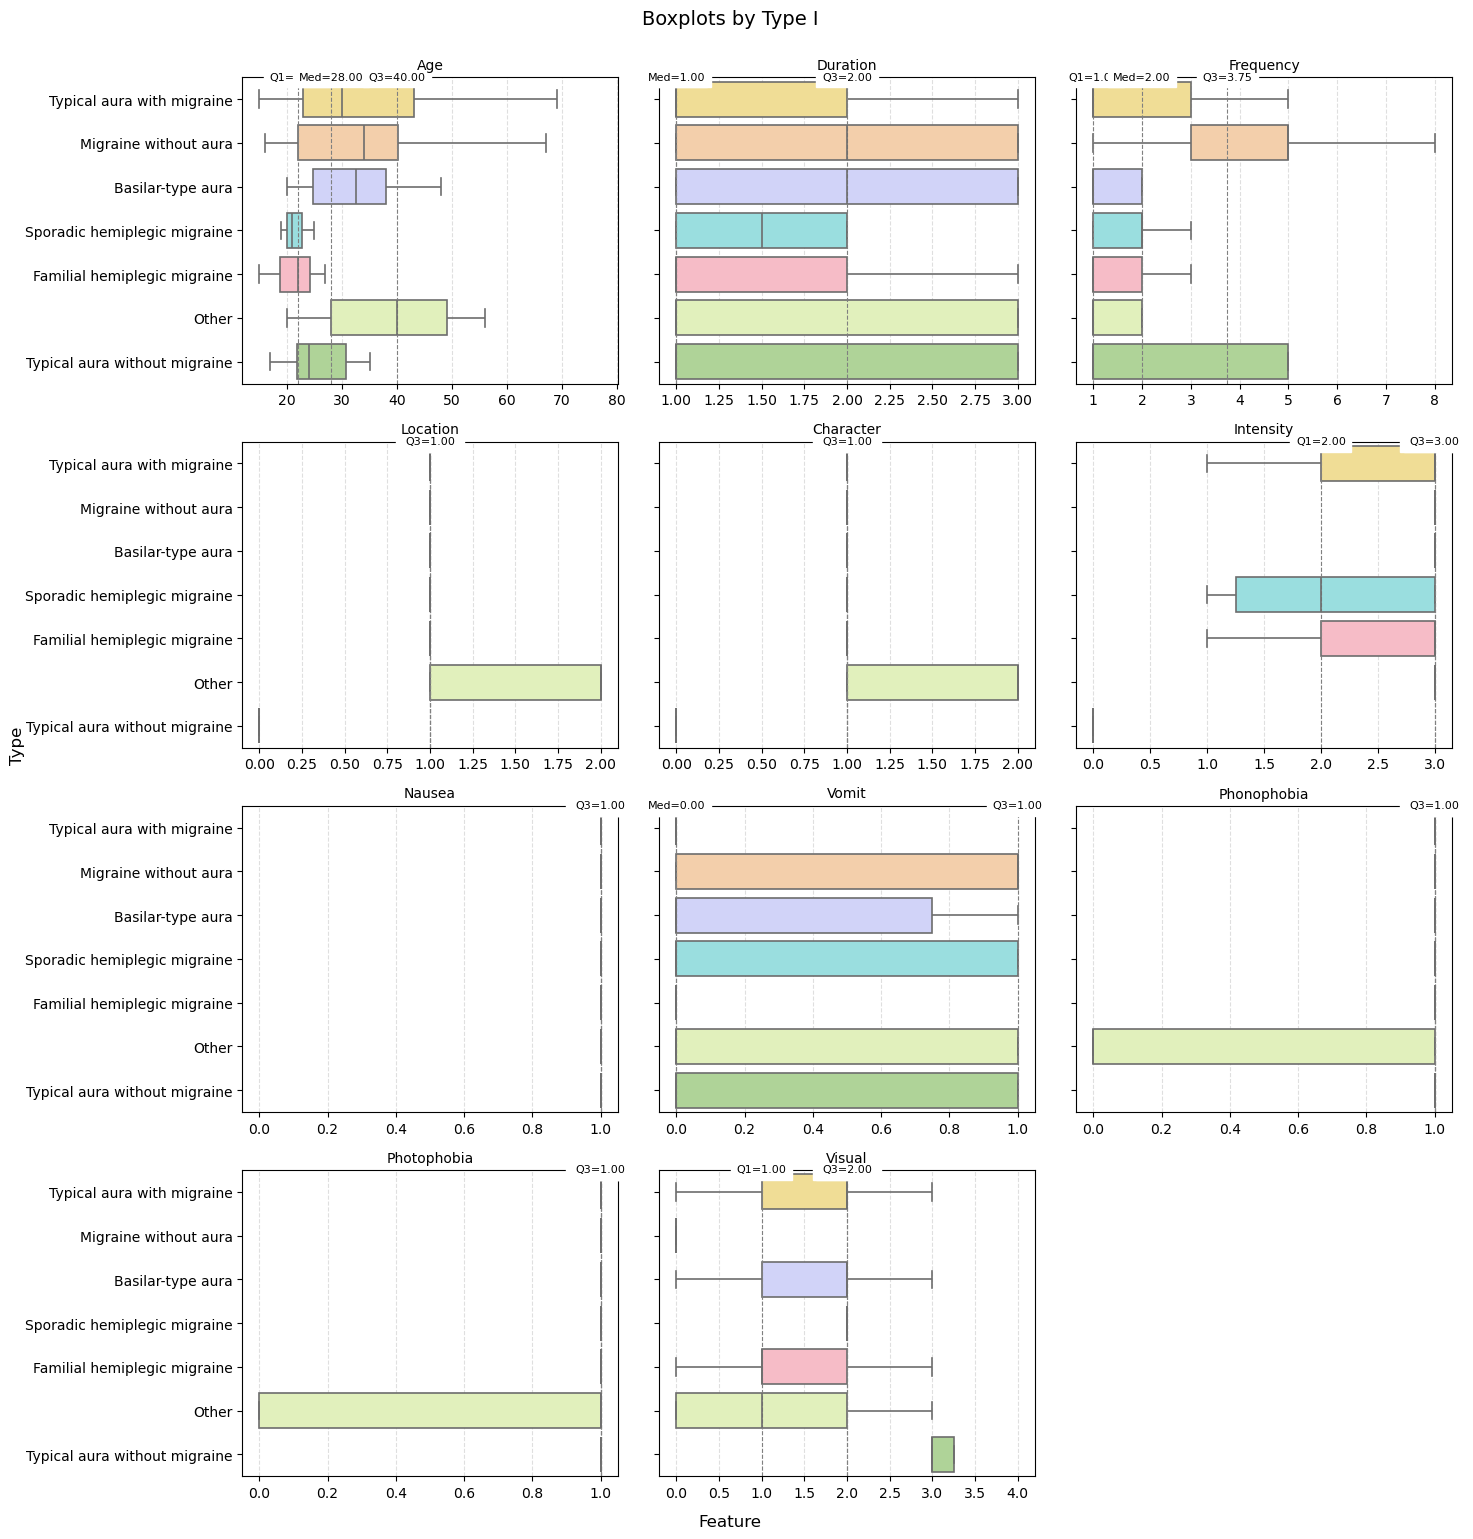

C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature],y=df['Type'],
C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature],y=df['Type'],
C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature],y=df['Type'],
C:\Users\catas\AppData\Local\Temp\ipykernel_29512\178104021.py:17: FutureWarning: 

Passing `palette` without assigning `hue

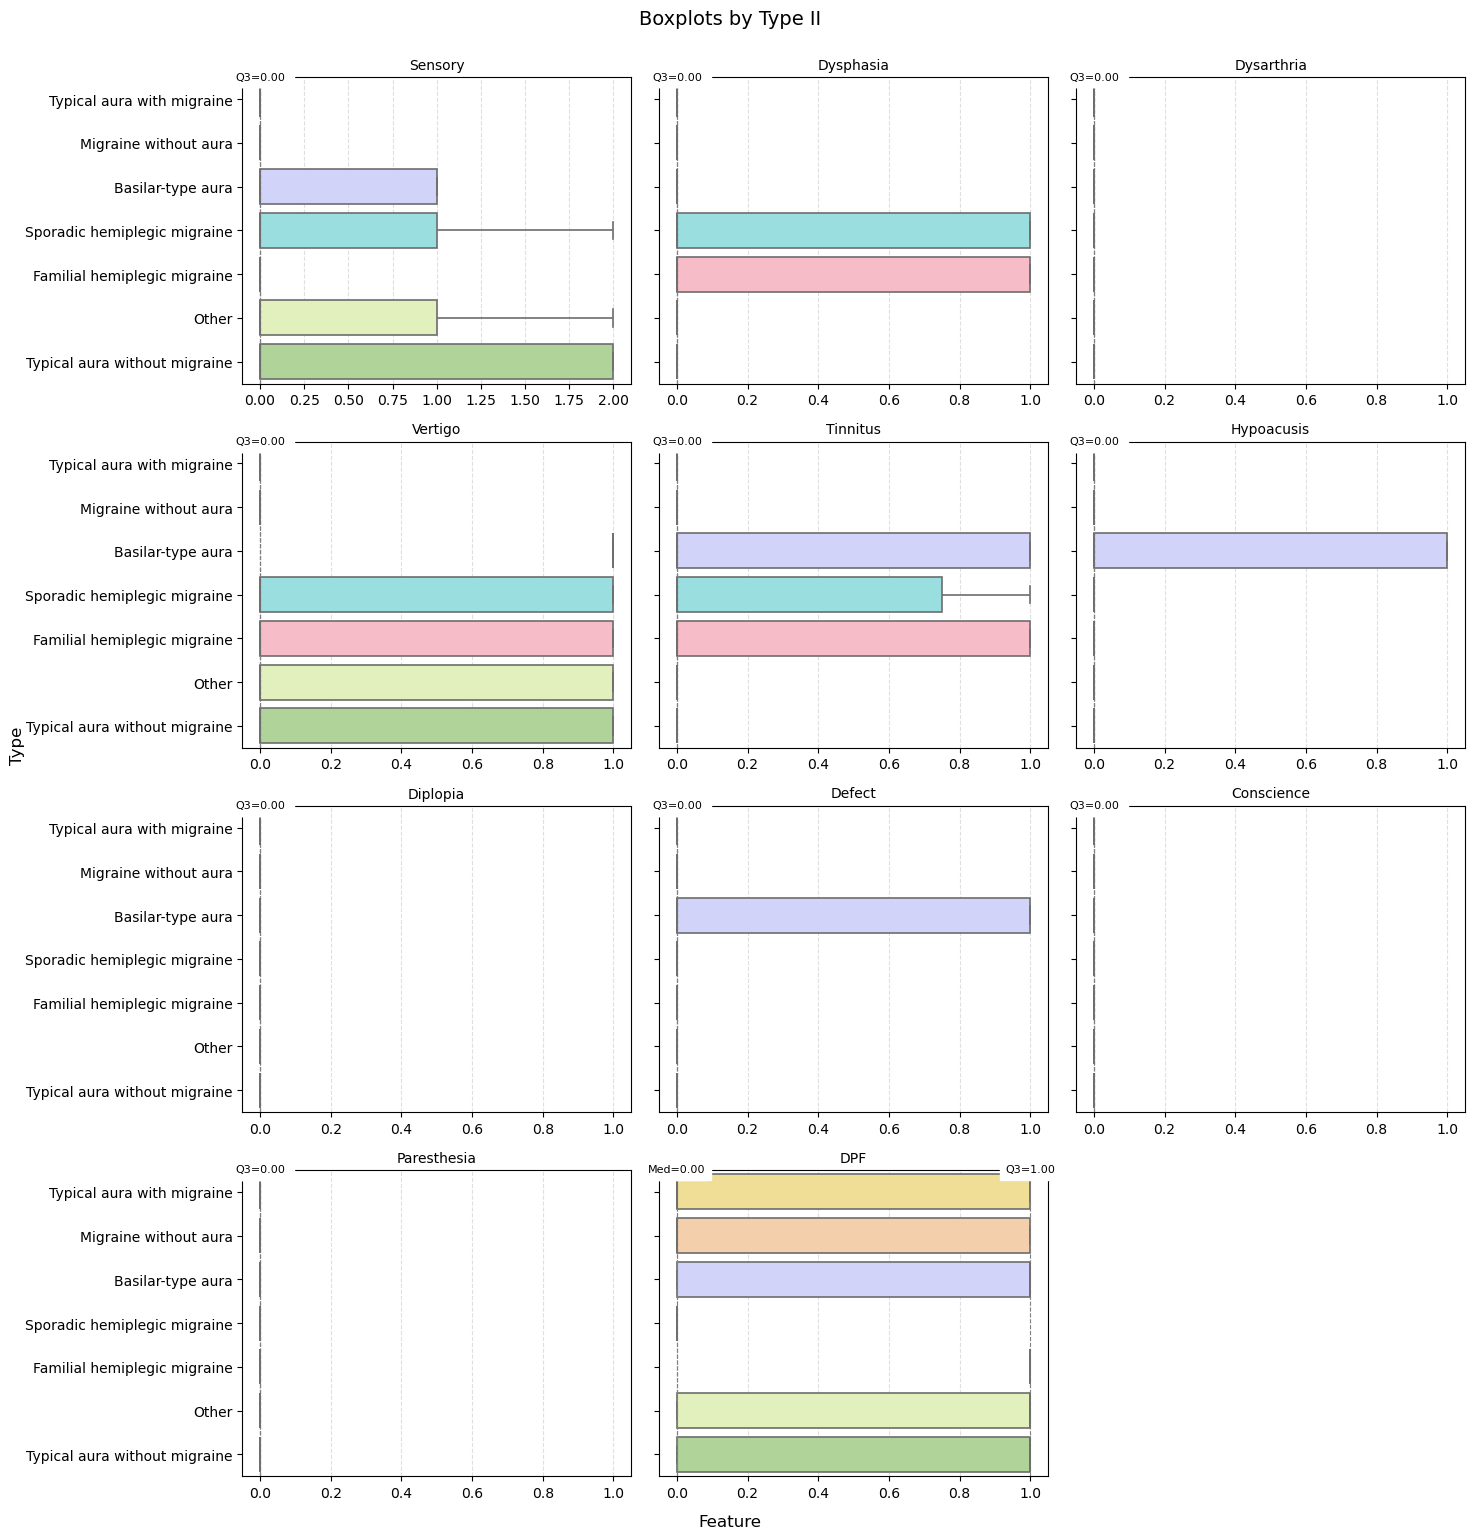

In [49]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
half = math.ceil(len(numeric_cols) / 2)
splits = [numeric_cols[:half], numeric_cols[half:]]
titles = [
    'Boxplots by Type I'.format(half),
    'Boxplots by Type II'.format(half+1, len(numeric_cols))]

for vars_subset, title in zip(splits, titles):
    n = len(vars_subset)
    ncols = 3
    nrows = math.ceil(n / ncols)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharex=False, sharey=True)
    axes = axes.flatten()
    
    for ax, feature in zip(axes, vars_subset):
        sns.boxplot(x=df[feature],y=df['Type'],
            palette=custom_palette_migraine,linewidth=1.2,fliersize=0,orient='h',ax=ax)
        s = df[feature].dropna()
        q1, med, q3 = s.quantile([0.25,0.5,0.75])
        for label, xval in zip(['Q1','Med','Q3'], [q1,med,q3]):
            ax.axvline(xval, color='gray', linestyle='--', lw=0.8)
            ax.text(xval, -0.4,f"{label}={xval:.2f}",ha='center', va='bottom',fontsize=8, backgroundcolor='white')
        ax.set_title(feature, fontsize=10)
        ax.grid(axis='x', linestyle='--', alpha=0.4)
        ax.set_ylabel('')
        ax.set_xlabel('')
    
    for j in range(len(vars_subset), len(axes)):
        fig.delaxes(axes[j])
    
    fig.supxlabel('Feature', fontsize=12)
    fig.supylabel('Type', fontsize=12)
    fig.suptitle(title, fontsize=14, y=0.96)
    
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.savefig(f"Boxplots_by_Type_{title.replace(' ','_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

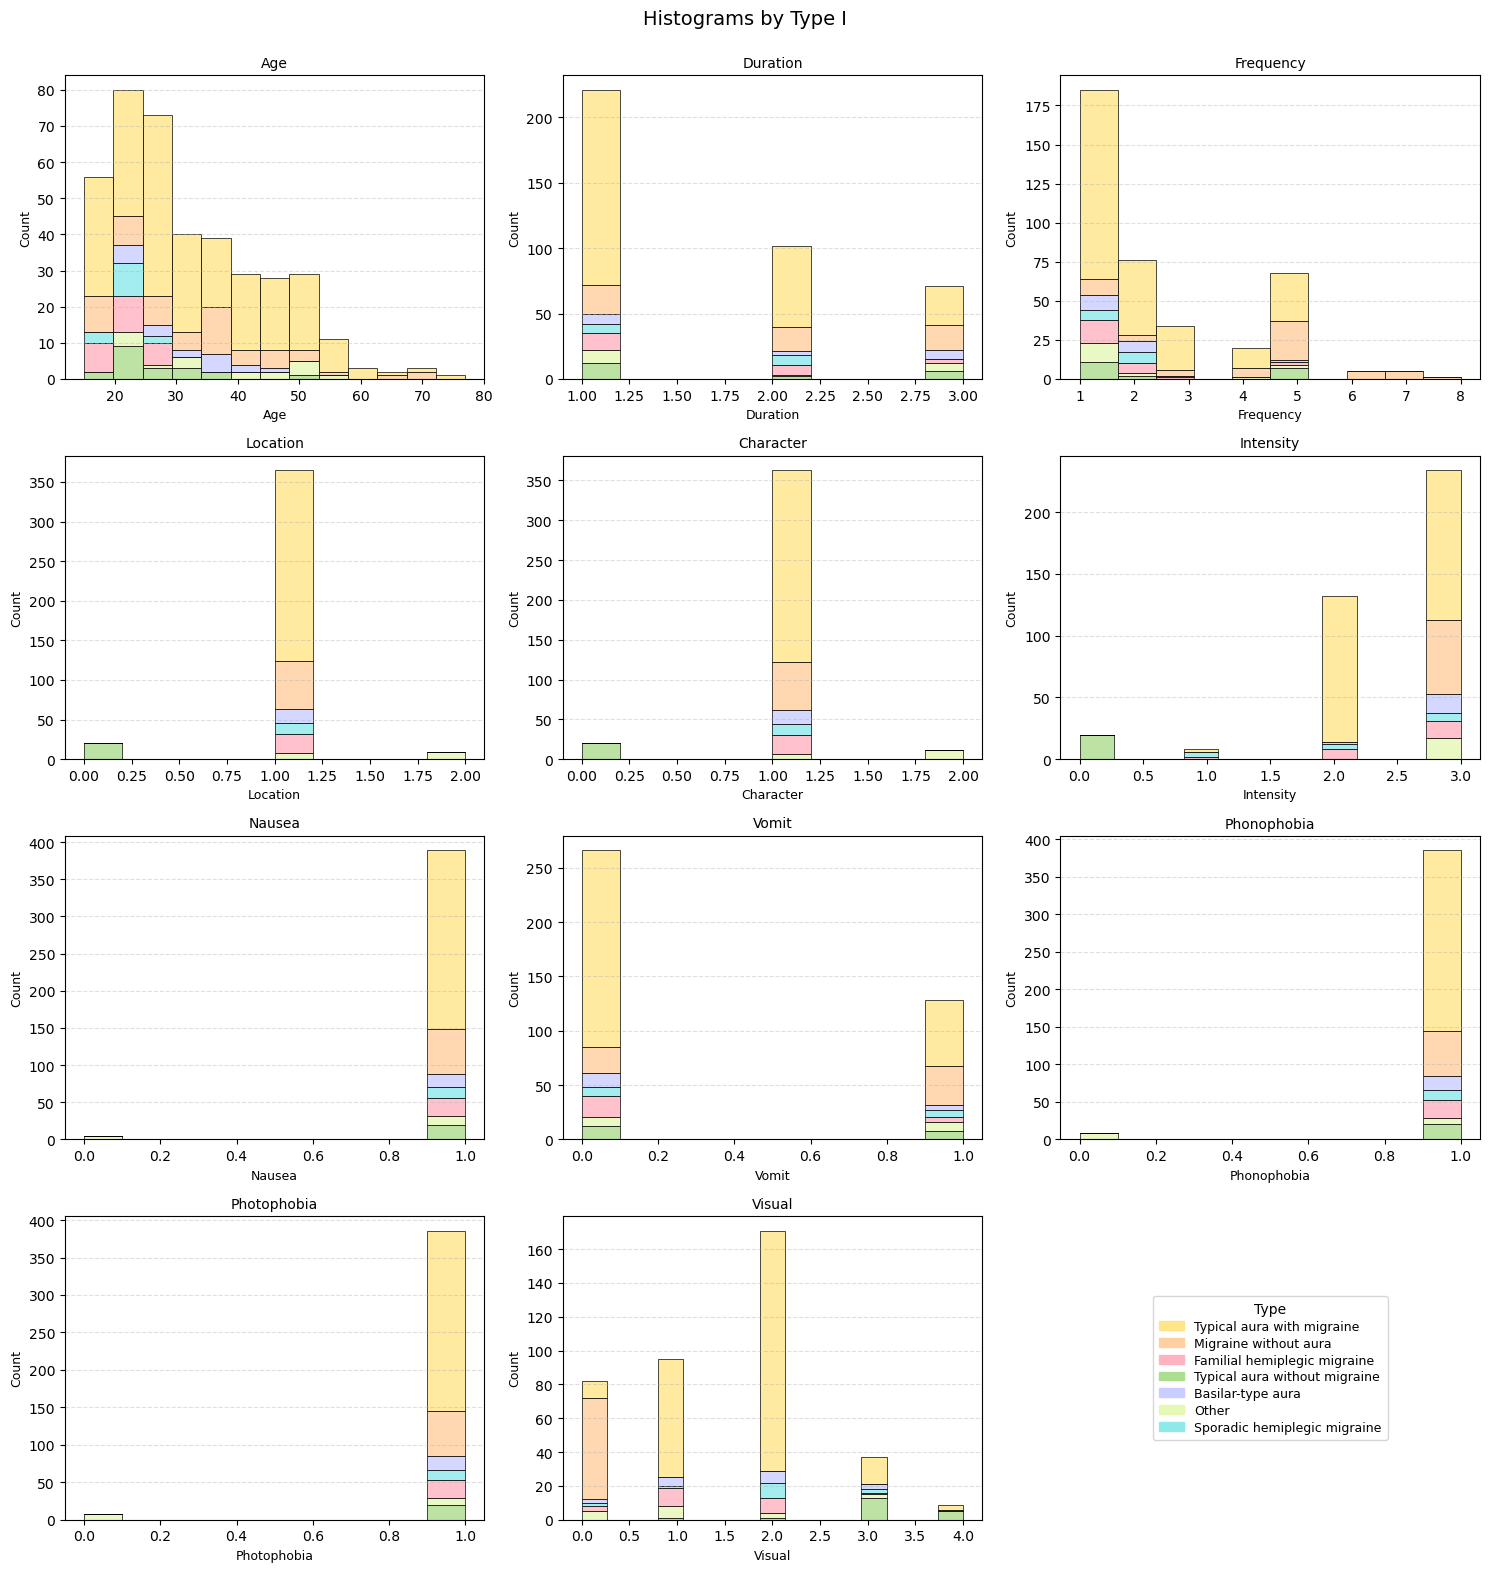

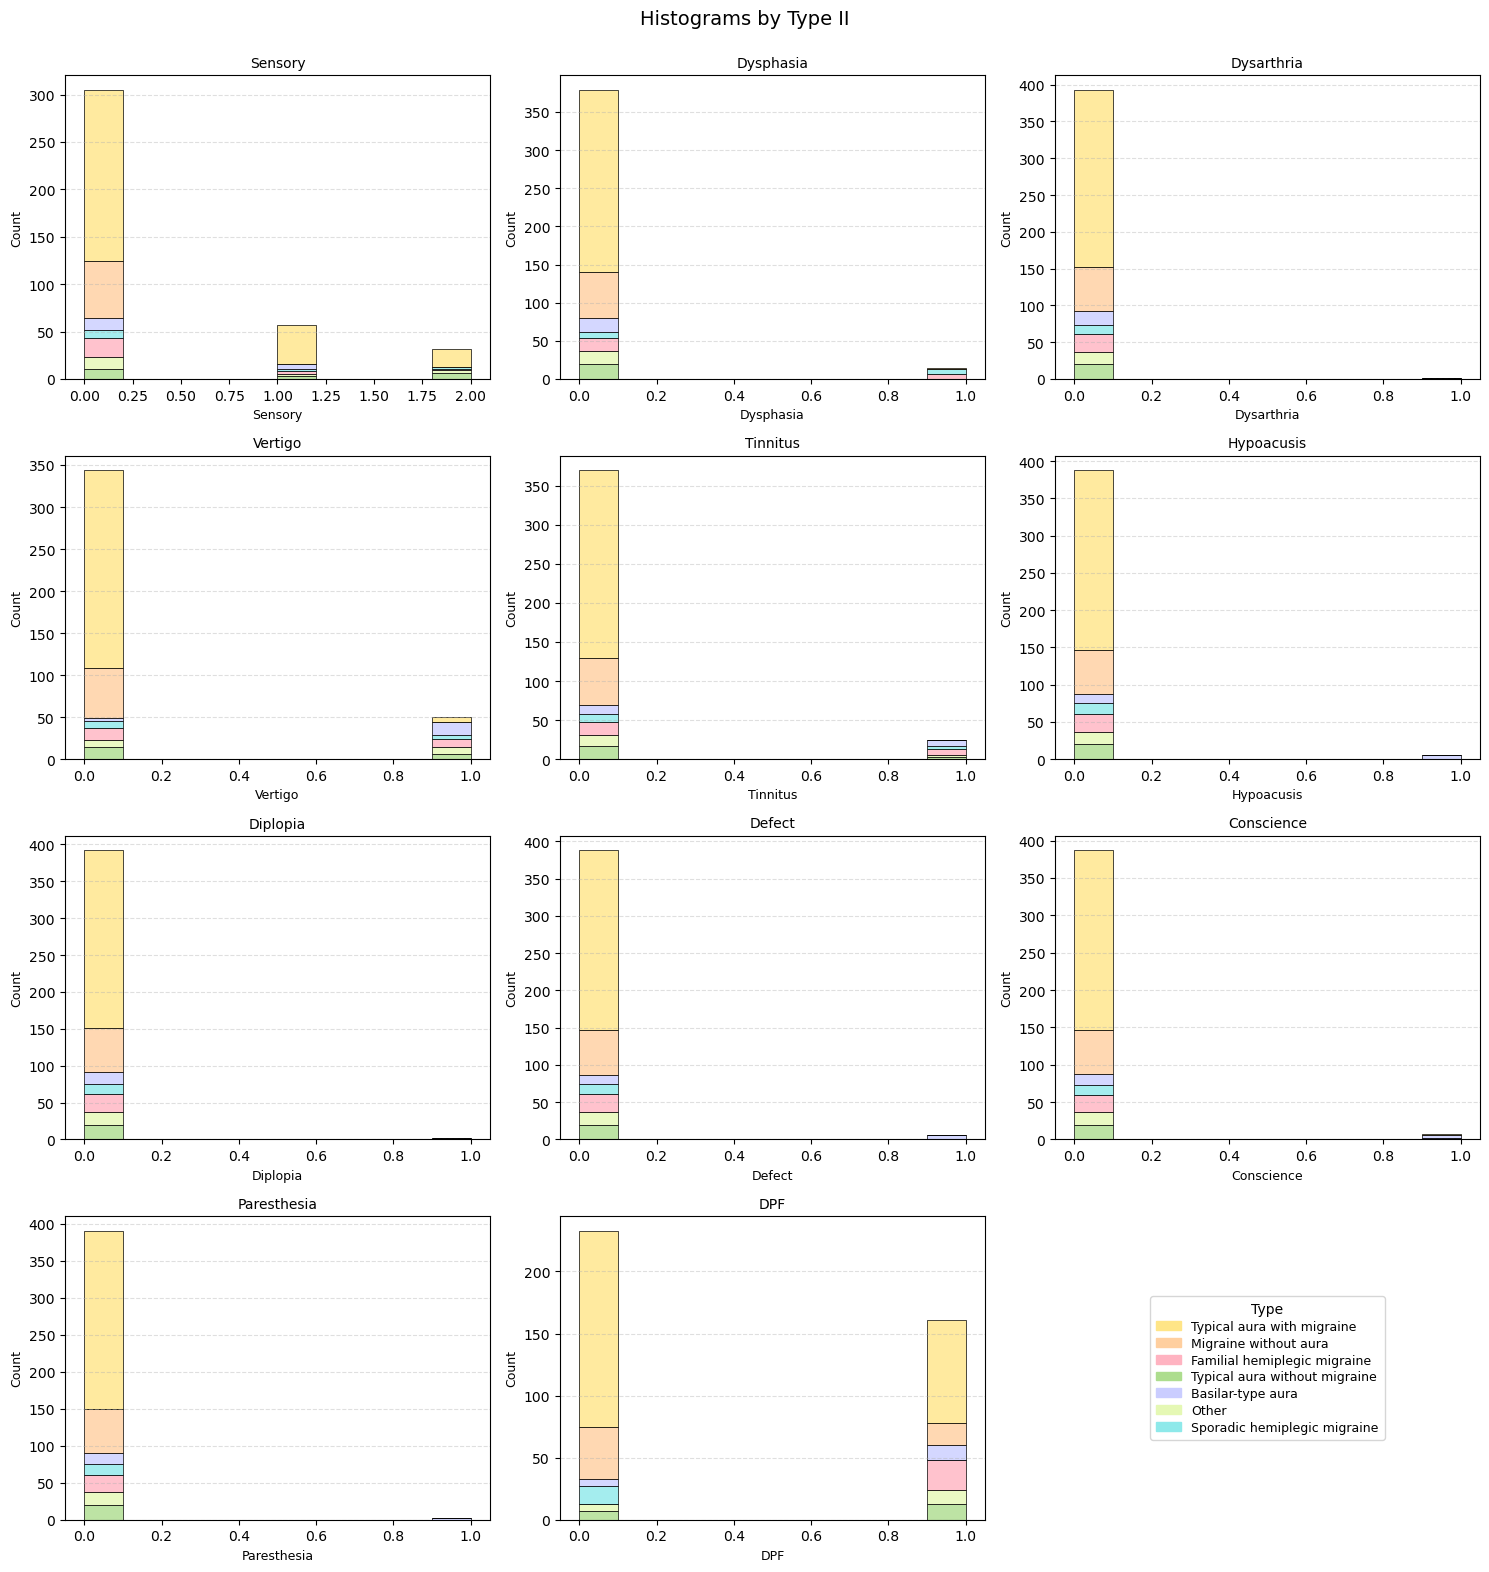

In [157]:
type_counts = df['Type'].value_counts().to_dict()
numeric_cols = df.select_dtypes(include='number').columns.tolist()
half = math.ceil(len(numeric_cols) / 2)
splits = [numeric_cols[:half], numeric_cols[half:]]
titles = ['Histograms by Type I', 'Histograms by Type II']

for vars_subset, title in zip(splits, titles):
    n = len(vars_subset)
    ncols = 3
    nrows = math.ceil(n / ncols)
    total_subplots = nrows * ncols
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), sharex=False, sharey=False)
    axes = axes.flatten()
    
    for idx, feature in enumerate(vars_subset):
        ax = axes[idx]
        sns.histplot(data=df, x=feature, hue='Type',
                     palette=custom_palette_migraine, multiple='stack', edgecolor='black', linewidth=0.5, alpha=0.8, ax=ax)
        ax.set_title(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=9)
        ax.set_xlabel(feature, fontsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    
    num_empty = total_subplots - n
    if num_empty > 0:
        legend_ax_index = n  
        for j in range(legend_ax_index + 1, total_subplots):
            fig.delaxes(axes[j])
        legend_ax = axes[legend_ax_index]
        legend_ax.axis('off')
        
        patches = []
        for tipo, color in custom_palette_migraine.items():
            label_text = tipo  
            patch = mpatches.Patch(color=color, label=label_text)
            patches.append(patch)
        
        legend_ax.legend(handles=patches, title='Type', loc='center', fontsize=9, title_fontsize=10, frameon=True, 
                         framealpha=0.8, borderpad=0.5, labelspacing=0.3)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
    else:
        last_ax = axes[n - 1]
        
        patches = []
        for tipo, color in custom_palette_migraine.items():
            label_text = tipo
            patch = mpatches.Patch(color=color, label=label_text)
            patches.append(patch)
        
        last_ax.legend(handles=patches, title='Type', loc='center left',
            bbox_to_anchor=(1.05, 0.7), fontsize=11,title_fontsize=12,
            frameon=True, framealpha=0.8, borderpad=0.5, labelspacing=0.3)
        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    
    fig.suptitle(title, fontsize=14, y=0.98)
    plt.savefig(f"Histograms_by_Type_{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

### 3.2) Preprocessing 

#### Encode categorical target

In [51]:
le = LabelEncoder()
df["Target"] = le.fit_transform(df['Type'].astype(str))
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Encoded of Target variable:", mapping)

Mapping Encoded of Target variable: {'Basilar-type aura': 0, 'Familial hemiplegic migraine': 1, 'Migraine without aura': 2, 'Other': 3, 'Sporadic hemiplegic migraine': 4, 'Typical aura with migraine': 5, 'Typical aura without migraine': 6}


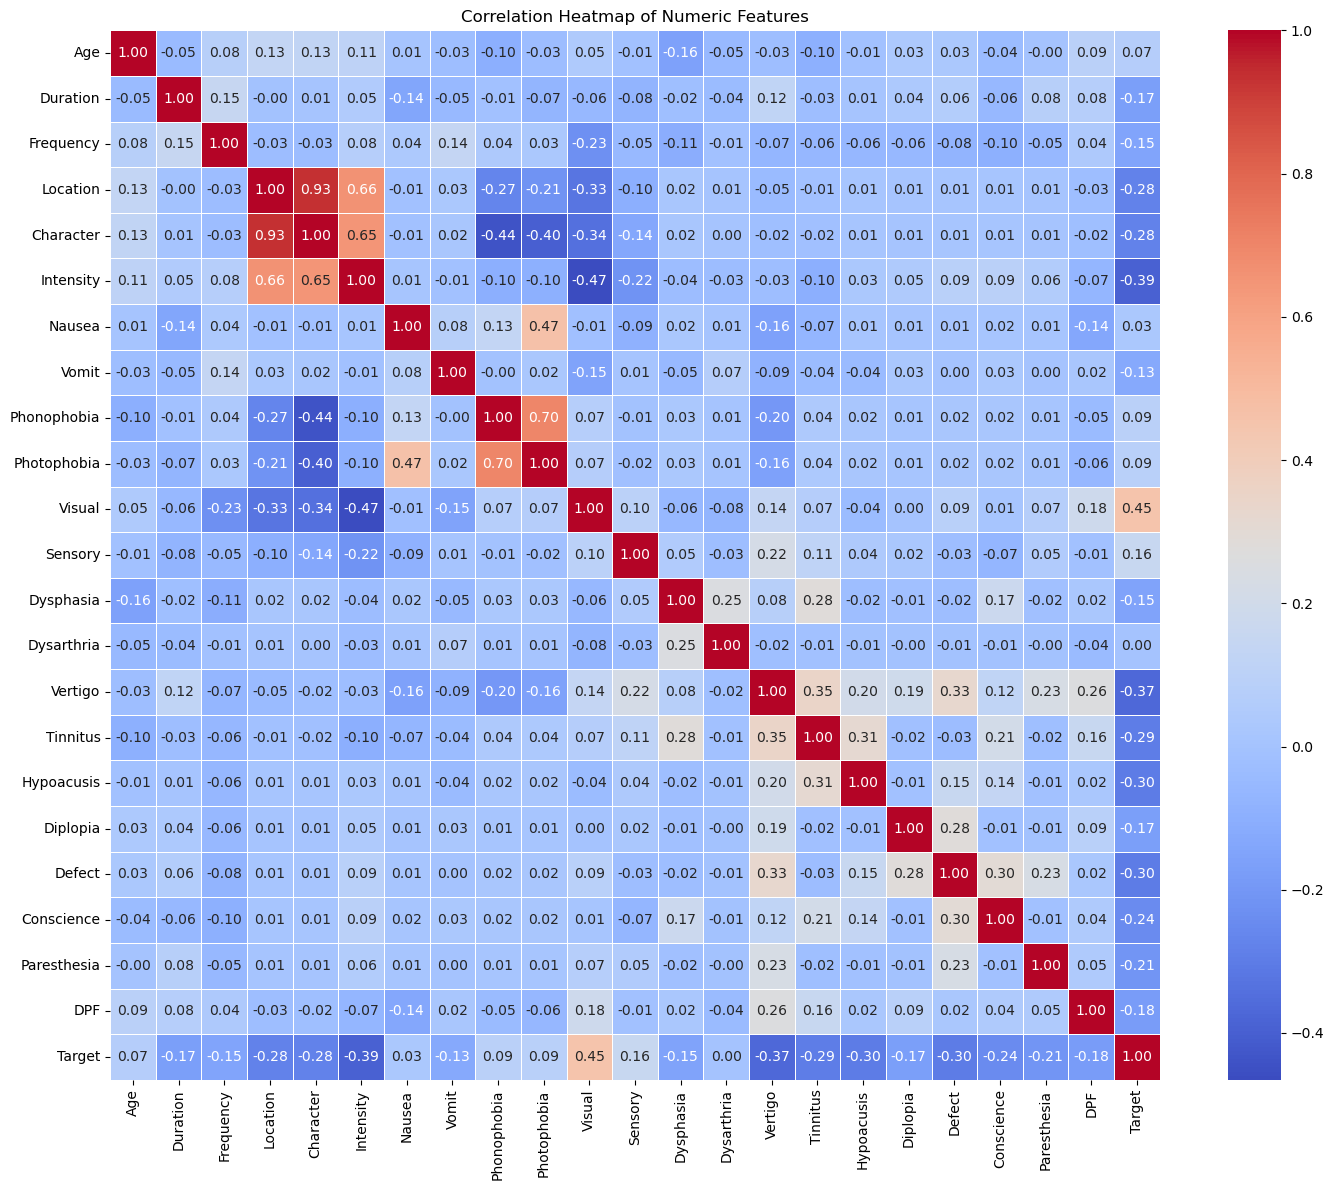

In [53]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric_cols].corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr,
            cmap='coolwarm',      
            annot=True, fmt=".2f",
            linewidths=0.5,
            square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.savefig("corr_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [55]:
corr['Target'].sort_values(ascending = False)

Target         1.000000e+00
Visual         4.539072e-01
Sensory        1.550179e-01
Phonophobia    9.226253e-02
Photophobia    8.687320e-02
Age            6.998817e-02
Nausea         2.736558e-02
Dysarthria     2.724697e-17
Vomit         -1.275420e-01
Frequency     -1.485352e-01
Dysphasia     -1.520628e-01
Diplopia      -1.724116e-01
Duration      -1.725720e-01
DPF           -1.807056e-01
Paresthesia   -2.114301e-01
Conscience    -2.434721e-01
Location      -2.780963e-01
Character     -2.793962e-01
Tinnitus      -2.945682e-01
Defect        -3.001610e-01
Hypoacusis    -3.001610e-01
Vertigo       -3.680953e-01
Intensity     -3.933369e-01
Name: Target, dtype: float64

#### Separate independent features and target variable

In [57]:
X = df.drop(columns=['Type', 'Target'])
y = df['Target']

#### Split data

Split ratio is 80% for training and 20% for testing.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Train/Test shapes:", X_train.shape, X_test.shape)

Train/Test shapes: (315, 22) (79, 22)


#### Scaling numeric features

Some preprocessing steps involve transforming the data into a more suitable and understandable format for the algorithms. In this case, One-hot encoding will be used for the categorical variables, and label encoding will be applied for the target variable, along with normalisation (MinMaxScaler or StandardScaler) of the numeric variables.

In [63]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Check class imbalance

In [175]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE


In [177]:
print("Original dataset shape %s" % Counter(y_train))


Original dataset shape Counter({5: 193, 2: 46, 1: 22, 0: 15, 6: 15, 3: 12, 4: 12})


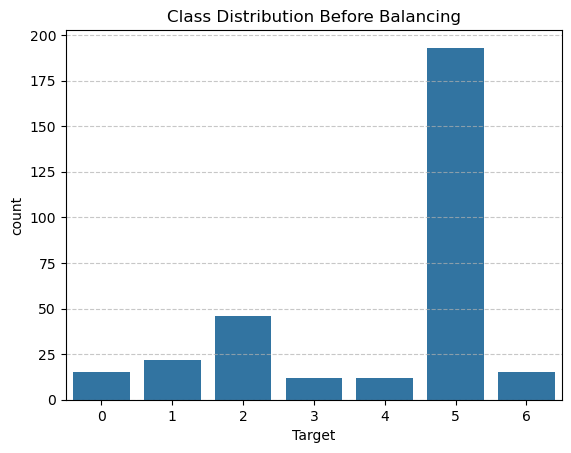

In [179]:
sns.countplot(x=y_train)
plt.title('Class Distribution Before Balancing')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Section 4:Implementation and Evaluation

### Task I

Let start with all features to implement MLPClassifier models.

#### MLP 1

Training accuracy: 1.000
Test accuracy:     0.924

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       0.75      1.00      0.86         3
 Familial hemiplegic migraine       0.33      0.50      0.40         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.60      0.75         5
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.98      0.98      0.98        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.92        79
                    macro avg       0.71      0.73      0.71        79
                 weighted avg       0.92      0.92      0.92        79



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

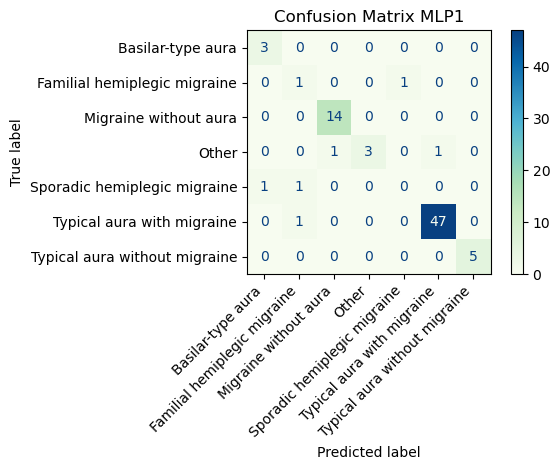

In [193]:
mlp = MLPClassifier(hidden_layer_sizes=(30, 15, 20), random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

train_acc = mlp.score(X_train_scaled, y_train)
test_acc  = mlp.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy:     {test_acc:.3f}")

y_pred = mlp.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='GnBu')
#plt.imshow(cm)
plt.title("Confusion Matrix MLP1")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45, ha="right")
plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.savefig("MLP1 confusion matrix.png", dpi=300, bbox_inches="tight")
plt.show

The results show that a training rate of 100% combined with a test rate of 92.4% suggests that the model has perfectly memorized the training samples (overfitting), although it maintains good performance on the test set. This is because the classes are unbalanced, and in this case, classes with few samples perform poorly. The next step is to adjust the imbalance and hyperparameters.

#### MLP 2

To simplify and streamline model iteration, we'll use Pipeline to describe workflow automation and optimization of the ML process.

In [195]:
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

param_grid = {
    'mlp__hidden_layer_sizes': [(30,15,20), (60,30,20)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.005, 0.01]}

# GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2)
grid.fit(X_train, y_train)

print("Best params:")
print(grid.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\catas\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best params:
{'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (60, 30, 20), 'mlp__learning_rate_init': 0.005}


Training accuracy: 1.000
Test accuracy:     0.924

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00         3
 Familial hemiplegic migraine       0.33      0.50      0.40         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.60      0.75         5
 Sporadic hemiplegic migraine       0.50      0.50      0.50         2
   Typical aura with migraine       0.98      0.98      0.98        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.94        79
                    macro avg       0.82      0.80      0.80        79
                 weighted avg       0.95      0.94      0.94        79



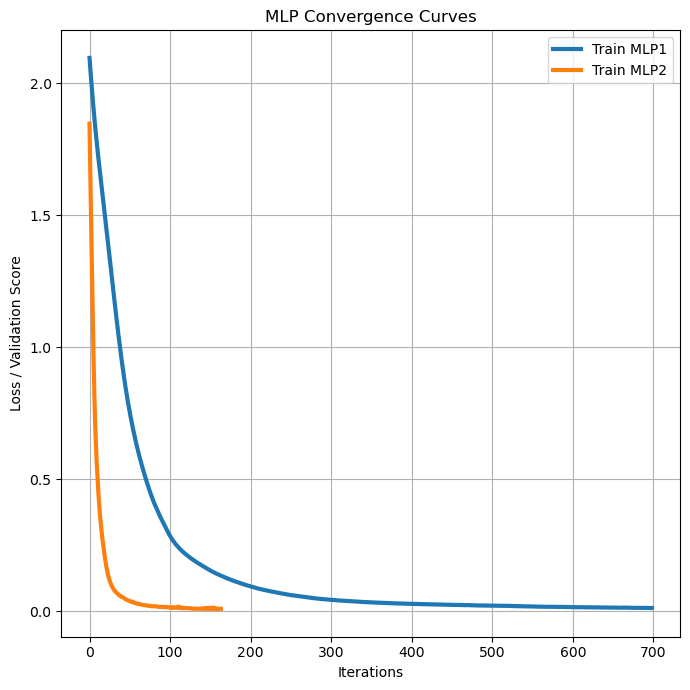

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

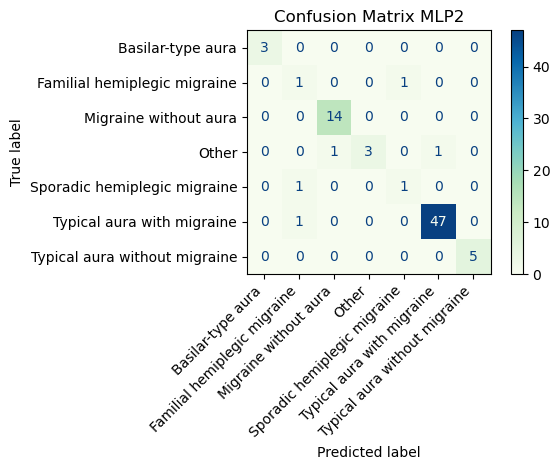

In [197]:
mlp2 = MLPClassifier(hidden_layer_sizes=(60, 30, 20), alpha=0.0001,                 # regularización L2
        learning_rate_init=0.005, random_state=42, max_iter=1000)
mlp2.fit(X_train_scaled, y_train)

train_acc2 = mlp2.score(X_train_scaled, y_train)
test_acc2  = mlp2.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy:     {test_acc:.3f}")

y_pred2 = mlp2.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred2, target_names=le.classes_))


plt.figure(figsize=(7, 7))
for model, label in zip([mlp, mlp2], ['MLP1', 'MLP2']):
    if hasattr(model, 'loss_curve_'):
        plt.plot(model.loss_curve_, label=f'Train {label}',linewidth=3)
    if hasattr(model, 'validation_scores_') and isinstance(model.validation_scores_, list) and len(model.validation_scores_) > 0:
        plt.plot(model.validation_scores_, linestyle='--', label=f'Validation {label}')

plt.xlabel('Iterations')
plt.ylabel('Loss / Validation Score')
plt.title('MLP Convergence Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("MLP Convergence Curves.png", dpi=300, bbox_inches="tight")
plt.show()

cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(cm2, display_labels=le.classes_)
disp.plot(cmap='GnBu')
#plt.imshow(cm)
plt.title("Confusion Matrix MLP2")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45, ha="right")
plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.savefig("MLP2 confusion matrix.png", dpi=300, bbox_inches="tight")
plt.show

#### MLP 3: Ensemble hard-voting

Ensemble Test Accuracy: 0.937

Ensemble Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00         3
 Familial hemiplegic migraine       0.50      0.50      0.50         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.60      0.75         5
 Sporadic hemiplegic migraine       1.00      0.50      0.67         2
   Typical aura with migraine       0.94      0.98      0.96        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.94        79
                    macro avg       0.91      0.80      0.83        79
                 weighted avg       0.94      0.94      0.93        79



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x800 with 0 Axes>

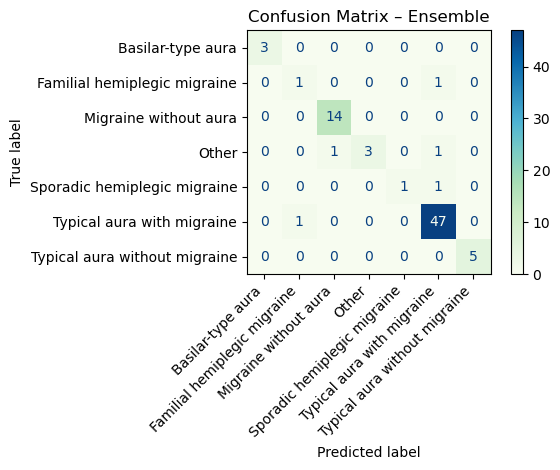

In [201]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(60, 30, 20),alpha=0.0001, learning_rate_init=0.005, max_iter=1000,random_state=0)
mlp_2 = MLPClassifier(hidden_layer_sizes=(60, 30, 20),alpha=0.0001, learning_rate_init=0.005, max_iter=1000,random_state=1)
mlp_3 = MLPClassifier(hidden_layer_sizes=(60, 30, 20),alpha=0.0001, learning_rate_init=0.005, max_iter=1000,random_state=2)

ensemble = VotingClassifier(estimators=[('mlp0', mlp_1), ('mlp1', mlp_2), ('mlp2', mlp_3)], voting='hard', n_jobs=-1)
ensemble.fit(X_train_scaled, y_train)

y_pred_ens = ensemble.predict(X_test_scaled)
acc_ens = accuracy_score(y_test, y_pred_ens)
print(f"Ensemble Test Accuracy: {acc_ens:.3f}\n")
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ens, target_names=le.classes_))

cm3 = confusion_matrix(y_test, y_pred_ens)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(cm3, display_labels=le.classes_)
disp.plot(cmap='GnBu')
plt.title("Confusion Matrix – Ensemble")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45, ha="right")
plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.savefig("Confusion Matrix –Ensemble.png", dpi=300, bbox_inches="tight")
plt.show

### Task II
Now is necessary implement an ensemble model using sci-kit-learn.

Test Accuracy: 0.9747

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00         3
 Familial hemiplegic migraine       1.00      1.00      1.00         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.60      0.75         5
 Sporadic hemiplegic migraine       1.00      1.00      1.00         2
   Typical aura with migraine       0.98      1.00      0.99        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.97        79
                    macro avg       0.99      0.94      0.96        79
                 weighted avg       0.98      0.97      0.97        79



<Figure size 800x800 with 0 Axes>

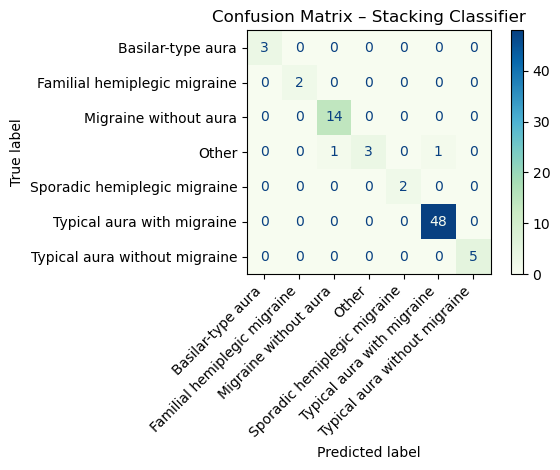

5-fold CV Accuracy: Mean=0.9016, Std=0.0442


In [203]:
estimators = [
    ('lr', ImbPipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(random_state=42))])),
    ('rf', ImbPipeline([
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])),
    ('gb', ImbPipeline([
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))])),
    ('mlp', ImbPipeline([
        ('scaler', StandardScaler()),
        ('clf', MLPClassifier(hidden_layer_sizes=(60, 30, 20), alpha=0.0001, learning_rate_init=0.005, max_iter=1000, random_state=42))])),
    ('svc', ImbPipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', probability=True, random_state=42))]))]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=estimators,
    final_estimator=LogisticRegression(max_iter=300, random_state=42), passthrough=False, cv=5, n_jobs=-1)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm4 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(cm4, display_labels=le.classes_)
disp.plot(cmap='GnBu')
plt.title("Confusion Matrix – Stacking Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45, ha="right")
plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.savefig("Confusion Matrix –Stacking_Stacking Classifier.png", dpi=300, bbox_inches="tight")
plt.show()

# Optional: cross-validated performance on training data
cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("5-fold CV Accuracy: Mean={:.4f}, Std={:.4f}".format(cv_scores.mean(), cv_scores.std()))

Accuracy (test): 0.8861

Classification Report:
                               precision    recall  f1-score   support

            Basilar-type aura       1.00      1.00      1.00         3
 Familial hemiplegic migraine       0.25      1.00      0.40         2
        Migraine without aura       0.93      1.00      0.97        14
                        Other       1.00      0.60      0.75         5
 Sporadic hemiplegic migraine       0.67      1.00      0.80         2
   Typical aura with migraine       0.98      0.85      0.91        48
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.89        79
                    macro avg       0.83      0.92      0.83        79
                 weighted avg       0.95      0.89      0.90        79



<Figure size 800x800 with 0 Axes>

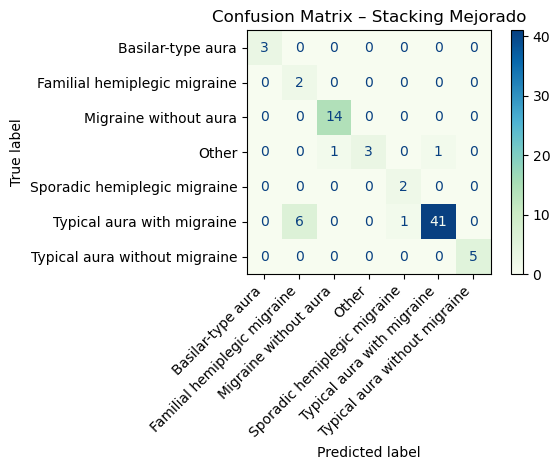

5-fold CV Macro-F1: Mean=0.8085, Std=0.0528


In [362]:
other_label = mapping['Other'] 
smote_other = SMOTE(sampling_strategy={ other_label: 25 }, random_state=42)

estimators = [
    ('lr', ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', smote_other),
        ('clf', LogisticRegression(random_state=42))])),
    ('rf', ImbPipeline([
        ('smote', smote_other),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])),
    ('gb', ImbPipeline([
        ('smote', smote_other),
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))])),
    ('mlp', ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', smote_other),
        ('clf', MLPClassifier(hidden_layer_sizes=(60, 30, 20), alpha=0.0001, learning_rate_init=0.005, max_iter=1000, random_state=42))])),
    ('svc', ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', smote_other),
        ('clf', SVC(kernel='rbf', probability=True, random_state=42))]))]

stacking_clf2 = StackingClassifier(estimators=estimators,
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),passthrough=True, cv=5, n_jobs=-1)

stacking_clf2.fit(X_train, y_train)

y_pred2 = stacking_clf2.predict(X_test)
print("Accuracy (test): {:.4f}".format(accuracy_score(y_test, y_pred2)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2, target_names=le.classes_))

cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=le.classes_)
plt.figure(figsize=(8,8))
disp2.plot(cmap='GnBu')
plt.title("Confusion Matrix – Stacking SMOTE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

cv_scores2 = cross_val_score(stacking_clf2, X_train, y_train,cv=5, scoring='f1_macro', n_jobs=-1)
print("5-fold CV Macro-F1: Mean={:.4f}, Std={:.4f}".format(
    cv_scores2.mean(), cv_scores2.std()))

### Task III

#### CNN1

Mapping Encoded of Target variable: {'Basilar-type aura': 0, 'Familial hemiplegic migraine': 1, 'Migraine without aura': 2, 'Other': 3, 'Sporadic hemiplegic migraine': 4, 'Typical aura with migraine': 5, 'Typical aura without migraine': 6}
# Features: 22
grid_size (ceil(sqrt(n_features))): 5
Shape X_train_cnn: (315, 5, 5, 1)
Shape X_test_cnn:  (79, 5, 5, 1)


C:\Users\catas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_183 (Conv2D)                  │ (None, 5, 5, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_199              │ (None, 5, 5, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_185 (Dropout)                │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_184 (Conv2D)                  │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_200              │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_186 (Dropout)                │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_185 (Conv2D)                  │ (None, 1, 1, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_201              │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_187 (Dropout)                │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_27          │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_202              │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_188 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_203              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_189 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 161,927 (632.53 KB)

 Trainable params: 160,711 (627.78 KB)

 Non-trainable params: 1,216 (4.75 KB)

Epoch 1/100
10/10 - 6s - 631ms/step - accuracy: 0.4508 - loss: 2.3622 - val_accuracy: 0.0633 - val_loss: 1175.4771 - learning_rate: 0.0500
Epoch 2/100
10/10 - 0s - 20ms/step - accuracy: 0.5619 - loss: 1.6114 - val_accuracy: 0.0633 - val_loss: 444.9573 - learning_rate: 0.0500
Epoch 3/100
10/10 - 0s - 20ms/step - accuracy: 0.6444 - loss: 1.4086 - val_accuracy: 0.1013 - val_loss: 126.8569 - learning_rate: 0.0500
Epoch 4/100
10/10 - 0s - 20ms/step - accuracy: 0.6952 - loss: 1.2448 - val_accuracy: 0.0759 - val_loss: 47.3828 - learning_rate: 0.0500
Epoch 5/100
10/10 - 0s - 20ms/step - accuracy: 0.7111 - loss: 1.0522 - val_accuracy: 0.0633 - val_loss: 25.8404 - learning_rate: 0.0500
Epoch 6/100
10/10 - 0s - 20ms/step - accuracy: 0.7683 - loss: 0.9478 - val_accuracy: 0.0759 - val_loss: 8.3903 - learning_rate: 0.0500
Epoch 7/100
10/10 - 0s - 20ms/step - accuracy: 0.7810 - loss: 0.7593 - val_accuracy: 0.4304 - val_loss: 3.3138 - learning_rate: 0.0500
Epoch 8/100
10/10 - 0s - 19ms/step - accuracy

C:\Users\catas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\catas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\catas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


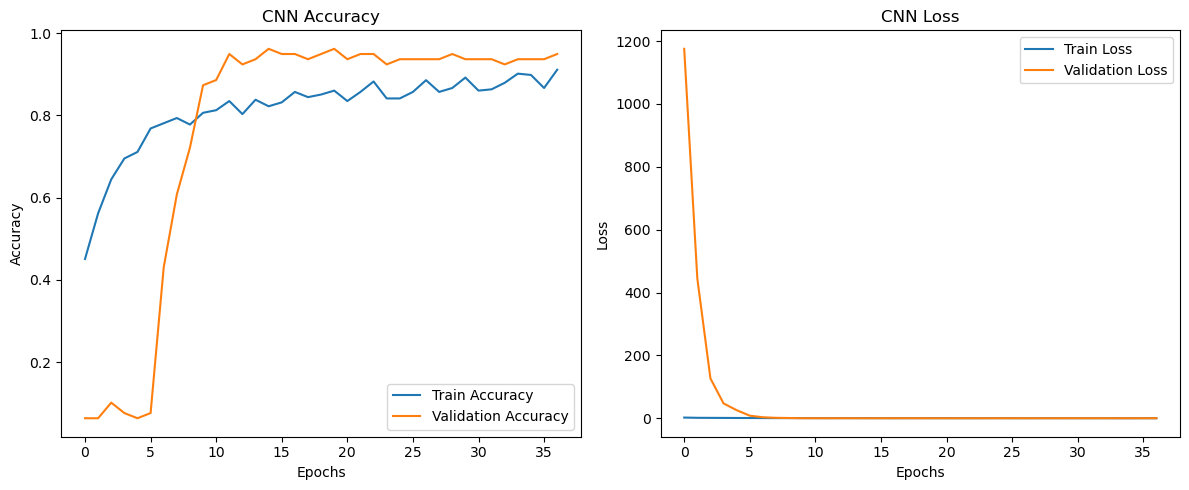

<Figure size 800x800 with 0 Axes>

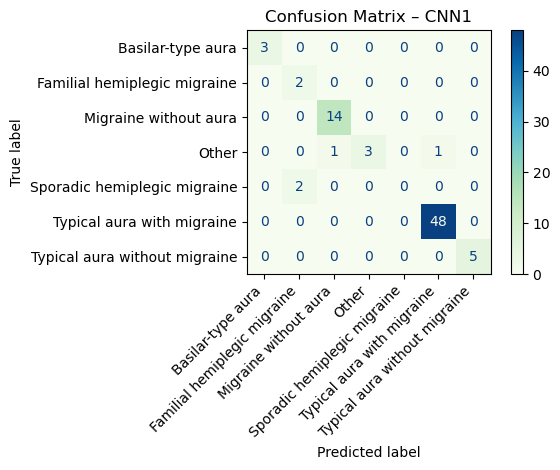

In [137]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Encoded of Target variable:", mapping)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_samples_train, n_features = X_train_scaled.shape
grid_size = int(np.ceil(np.sqrt(n_features)))
grid_total = grid_size ** 2

print("# Features:", n_features)
print("grid_size (ceil(sqrt(n_features))):", grid_size)

def reshape_to_grid(X_flat, grid_size, grid_total):
    n_samples, n_feat = X_flat.shape
    # Fill with zeros
    if n_feat < grid_total:
        padding = np.zeros((n_samples, grid_total - n_feat), dtype=X_flat.dtype)
        X_padded = np.concatenate([X_flat, padding], axis=1)
    else:
        X_padded = X_flat[:, :grid_total]
    # Reshape a (n_samples, 5, 5, 1)
    return X_padded.reshape((n_samples, grid_size, grid_size, 1))

X_train_cnn = reshape_to_grid(X_train_scaled, grid_size, grid_total)
X_test_cnn  = reshape_to_grid(X_test_scaled,  grid_size, grid_total)

print("Shape X_train_cnn:", X_train_cnn.shape)  
print("Shape X_test_cnn: ", X_test_cnn.shape)

num_classes = len(le.classes_)
input_shape = (grid_size, grid_size, 1)

model = models.Sequential([
    # ===== Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='valid'),
    layers.Dropout(0.25),

    # ===== Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='valid'),
    layers.Dropout(0.25),

    # # ===== Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),

    # ===== Final Dense Layers
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')])

model.summary()

optimizer = optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping( monitor='val_loss', patience=15, restore_best_weights=True,verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-5, verbose=1)

history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test),
    epochs=100, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=2)

train_loss, train_acc = model.evaluate(X_train_cnn, y_train, verbose=0)
test_loss, test_acc   = model.evaluate(X_test_cnn, y_test,   verbose=0)
print(f"\nCNN Training accuracy: {train_acc:.3f}")
print(f"CNN Test accuracy:     {test_acc:.3f}")

y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss')
plt.legend()
plt.tight_layout()
plt.savefig("Curves Accuracy and Loss CNN1.png", dpi=300, bbox_inches="tight")
plt.show()

cm_cnn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(cm_cnn, display_labels=le.classes_)
disp.plot(cmap='GnBu')
plt.title("Confusion Matrix – CNN1")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45, ha="right")
plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.savefig("Confusion Matrix – CNN1.png", dpi=300, bbox_inches="tight")
plt.show()

#### CNN2

Mapping Encoded of Target variable: {'Basilar-type aura': 0, 'Familial hemiplegic migraine': 1, 'Migraine without aura': 2, 'Other': 3, 'Sporadic hemiplegic migraine': 4, 'Typical aura with migraine': 5, 'Typical aura without migraine': 6}
After oversampling, each class has: [193 193 193 193 193 193 193]
Class weights (post-oversampling): {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}
# Features: 22
grid_size: 5
Shape X_train_cnn: (1351, 5, 5, 1)
Shape X_test_cnn:  (79, 5, 5, 1)


Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_75 (InputLayer)          │ (None, 5, 5, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_249 (Conv2D)                  │ (None, 5, 5, 16)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_290              │ (None, 5, 5, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_125 (MaxPooling2D)     │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_276 (Dropout)                │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_250 (Conv2D)                  │ (None, 2, 2, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_291              │ (None, 2, 2, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_126 (MaxPooling2D)     │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_277 (Dropout)                │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_251 (Conv2D)                  │ (None, 1, 1, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_292              │ (None, 1, 1, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_278 (Dropout)                │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_49          │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_293              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_279 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,615 (111.78 KB)

 Trainable params: 28,263 (110.40 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/200
85/85 - 5s - 54ms/step - accuracy: 0.4685 - loss: 1.5686 - val_accuracy: 0.8608 - val_loss: 1.1842 - learning_rate: 0.0050
Epoch 2/200
85/85 - 1s - 7ms/step - accuracy: 0.6765 - loss: 0.8792 - val_accuracy: 0.9114 - val_loss: 0.5363 - learning_rate: 0.0050
Epoch 3/200
85/85 - 1s - 7ms/step - accuracy: 0.7654 - loss: 0.6587 - val_accuracy: 0.9367 - val_loss: 0.3213 - learning_rate: 0.0050
Epoch 4/200
85/85 - 1s - 7ms/step - accuracy: 0.8024 - loss: 0.5806 - val_accuracy: 0.9367 - val_loss: 0.3201 - learning_rate: 0.0050
Epoch 5/200
85/85 - 1s - 7ms/step - accuracy: 0.8113 - loss: 0.5449 - val_accuracy: 0.9114 - val_loss: 0.3645 - learning_rate: 0.0050
Epoch 6/200
85/85 - 1s - 7ms/step - accuracy: 0.8564 - loss: 0.4450 - val_accuracy: 0.9241 - val_loss: 0.3223 - learning_rate: 0.0050
Epoch 7/200
85/85 - 1s - 7ms/step - accuracy: 0.8594 - loss: 0.4400 - val_accuracy: 0.9241 - val_loss: 0.3307 - learning_rate: 0.0050
Epoch 8/200
85/85 - 1s - 7ms/step - accuracy: 0.8623 - loss: 

<Figure size 800x800 with 0 Axes>

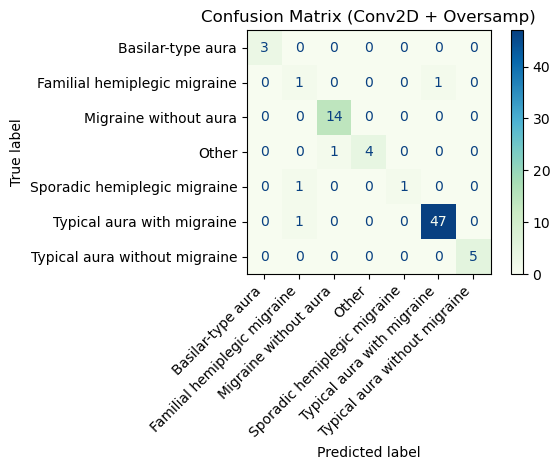

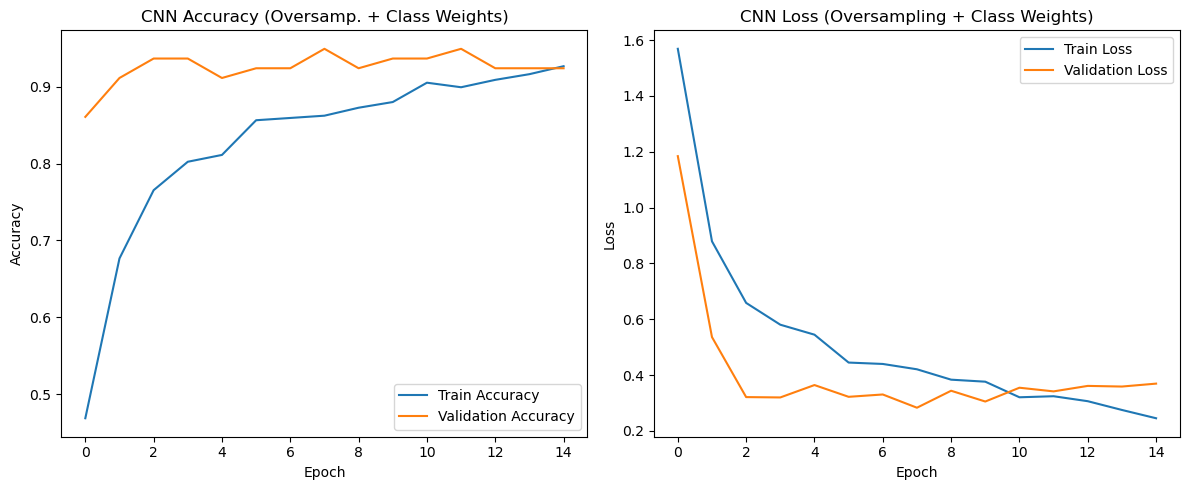

In [187]:
# Oversample 
df_train = pd.DataFrame(X_train_scaled)
df_train['Target'] = y_train.values

max_count = df_train['Target'].value_counts().max()

df_list = []
for cls, group in df_train.groupby('Target'):
    df_list.append(group)
    n_samples = len(group)
    if n_samples < max_count:
        df_upsampled = group.sample(
            max_count - n_samples,
            replace=True,
            random_state=42
        )
        df_list.append(df_upsampled)

df_balanced = pd.concat(df_list).reset_index(drop=True)

# Separate features after oversampling
X_train_bal = df_balanced.drop(columns=['Target']).values
y_train_bal = df_balanced['Target'].values
print("After oversampling, each class has:", np.bincount(y_train_bal))

# Compute class‐weights (balanced)
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_bal), y=y_train_bal)
class_weight_dict = dict(enumerate(class_weights_array))
print("Class weights (post-oversampling):", class_weight_dict)

n_samples_train, n_features = X_train_bal.shape
grid_size   = int(np.ceil(np.sqrt(n_features)))          
grid_total  = grid_size ** 2                               
print("# Features:", n_features)
print("grid_size:", grid_size)

def reshape_to_grid(X_flat, grid_size, grid_total):
    n_samples, n_feat = X_flat.shape
    if n_feat < grid_total:
        padding = np.zeros((n_samples, grid_total - n_feat), dtype=X_flat.dtype)
        X_padded = np.concatenate([X_flat, padding], axis=1)
    else:
        X_padded = X_flat[:, :grid_total]
    return X_padded.reshape((n_samples, grid_size, grid_size, 1))

# Reshape train and test
X_train_cnn = reshape_to_grid(X_train_bal, grid_size, grid_total)
X_test_cnn  = reshape_to_grid(X_test_scaled,  grid_size, grid_total)

print("Shape X_train_cnn:", X_train_cnn.shape)  # e.g. (n_train_bal, 5, 5, 1)
print("Shape X_test_cnn: ", X_test_cnn.shape)

# 7. Build a CNN with Conv2D + L2 + Dropout (friendly improvement)
num_classes = len(le.classes_)
input_shape = (grid_size, grid_size, 1)

inputs = Input(shape=input_shape)
x = layers.Conv2D(16, (3, 3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4))(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.summary()

optimizer = optimizers.Adam(learning_rate=5e-3)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(X_train_cnn, y_train_bal, validation_data=(X_test_cnn, y_test),
    epochs=200, batch_size=16, callbacks=[early_stop, reduce_lr], class_weight=class_weight_dict, verbose=2)


y_train_preds = model.predict(X_train_cnn)
y_train_pred_labels = np.argmax(y_train_preds, axis=1)
train_acc = np.mean(y_train_pred_labels == y_train_bal)

y_test_preds = model.predict(X_test_cnn)
y_test_pred_labels = np.argmax(y_test_preds, axis=1)
test_acc = np.mean(y_test_pred_labels == y_test)

print(f"\nCNN Training accuracy (manual): {train_acc:.3f}")
print(f"CNN Test accuracy (manual):     {test_acc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_labels, target_names=le.classes_))

cm = confusion_matrix(y_test, y_test_pred_labels)
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='GnBu')
plt.title("Confusion Matrix (Conv2D + Oversamp)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("Confusion Matrix – CNN2.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy (Oversamp. + Class Weights)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Loss (Oversampling + Class Weights)')
plt.legend()
plt.tight_layout()
plt.savefig("Curves Accuracy and Loss CNN2.png", dpi=300, bbox_inches="tight")
plt.show()


### Task IV

C:\Users\catas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\catas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\catas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\catas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

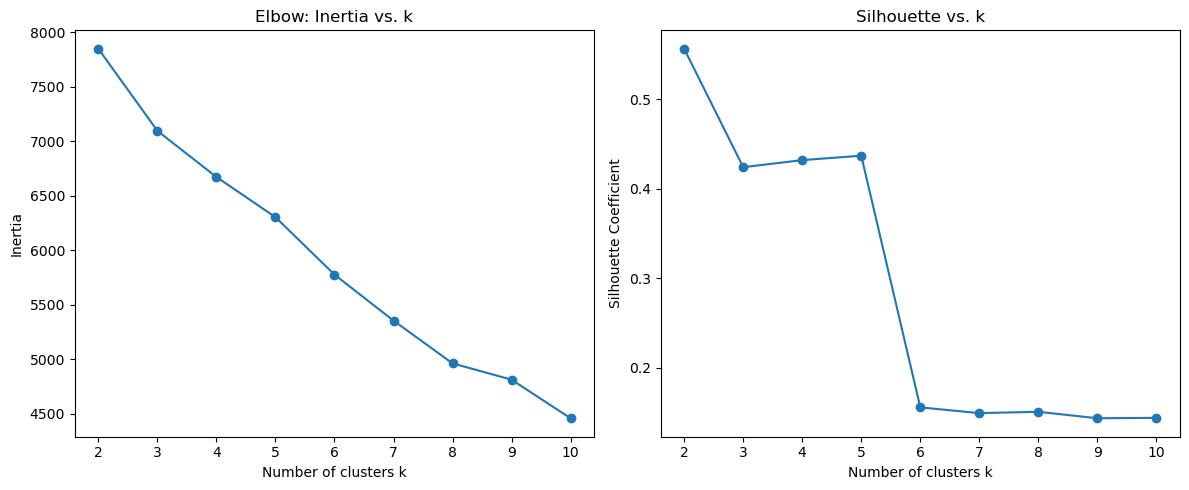

In [152]:
df = pd.read_csv("migraine_symptom_classification.csv")
df.drop_duplicates(inplace=True)

le = LabelEncoder()
df["Target"] = le.fit_transform(df['Type'].astype(str))
X = df.drop(columns=['Type', 'Target'])
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ks = range(2, 11)
inertias = []
silhouettes = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ks, inertias, '-o')
plt.title('Elbow: Inertia vs. k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(ks, silhouettes, '-o')
plt.title('Silhouette vs. k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.savefig("Elbow y Silhouette.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\catas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Optimal K (silhouette): 5
Accuracy clusters→clases: 0.716
Adjusted Rand Index:     0.393
Normalized MI Score:     0.492


<Figure size 700x700 with 0 Axes>

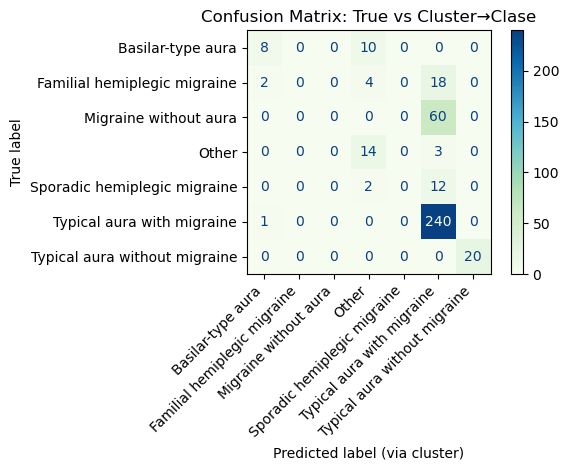

In [153]:
best_k = 5

#Final clustering
km_best = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = km_best.fit_predict(X_scaled)

mapping = {}
for c in range(best_k):
    mask = (cluster_labels == c)
    most_common = np.bincount(y[mask]).argmax()
    mapping[c] = most_common

y_from_cluster = np.array([mapping[c] for c in cluster_labels])

acc = accuracy_score(y, y_from_cluster)
ari = adjusted_rand_score(y, cluster_labels)
nmi = normalized_mutual_info_score(y, cluster_labels)

print(f"Optimal K (silhouette): {best_k}")
print(f"Accuracy clusters→clases: {acc:.3f}")
print(f"Adjusted Rand Index:     {ari:.3f}")
print(f"Normalized MI Score:     {nmi:.3f}")

cm = confusion_matrix(y, y_from_cluster)
plt.figure(figsize=(7,7))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='GnBu', values_format='d')
plt.title('Confusion Matrix: True vs Cluster→Clase')
classes = LabelEncoder().fit(df['Type']).classes_
plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
plt.yticks(range(len(classes)), classes)
plt.xlabel('Predicted label (via cluster)')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig("Confusion Matrix Cluster_Clase.png", dpi=300, bbox_inches="tight")
plt.show()

#### PCA

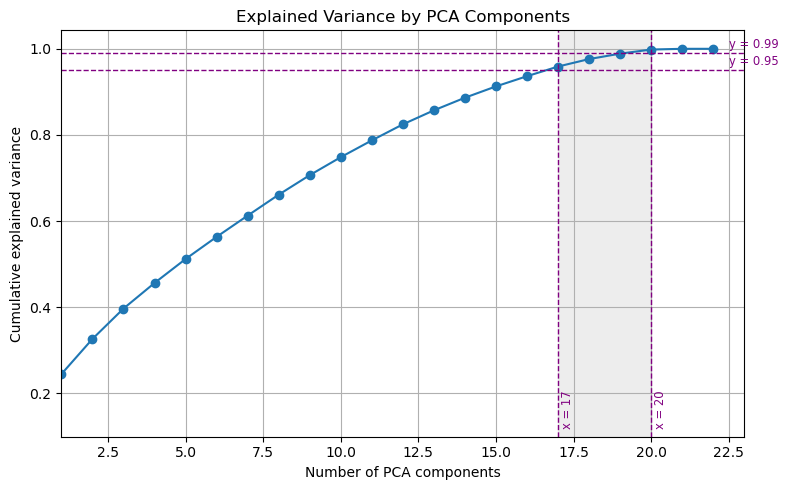

In [156]:
pca = PCA(n_components=None, random_state=42)
X_pca = pca.fit_transform(X_scaled)

n_components = pca.explained_variance_ratio_.shape[0]

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)

plt.axvspan(17, 20, color='lightgray', alpha=0.4)
plt.axvline(17, color='purple', linestyle='--', linewidth=1)
plt.axvline(20, color='purple', linestyle='--', linewidth=1)
plt.axhline(0.95, color='purple', linestyle='--', linewidth=1)
plt.axhline(0.99, color='purple', linestyle='--', linewidth=1)
ymin, ymax = plt.ylim()
yv_range = ymax - ymin
plt.text(17 + 0.1,ymin + 0.02 * yv_range,'x = 17',rotation=90, va='bottom', ha='left',color='purple',fontsize='small')
plt.text(20 + 0.1,ymin + 0.02 * yv_range,'x = 20',rotation=90,va='bottom',ha='left',color='purple',fontsize='small')
x_max = n_components

plt.text(x_max - 0.5, 0.95 + 0.005, 'y = 0.95', ha='left', va='bottom', color='purple', fontsize='small')
plt.text(x_max - 0.5, 0.99 + 0.005,'y = 0.99', ha='left',va='bottom', color='purple', fontsize='small')
plt.xlim(1, n_components)
plt.tight_layout()
plt.savefig("Explained Variance by PCA Components.png", dpi=300, bbox_inches="tight")
plt.show()

In [158]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.93) + 1
print(f"Number of components to explain 93% variance: {n_components}")

# Apply PCA with optimal n_components
pca_opt = PCA(n_components=n_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)

Number of components to explain 93% variance: 17


C:\Users\catas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


PCA (17 components) Clustering Accuracy: 0.815
PCA (17 components) Adjusted Rand Index: 0.601
PCA (17 components) Normalized MI Score: 0.580


<Figure size 700x700 with 0 Axes>

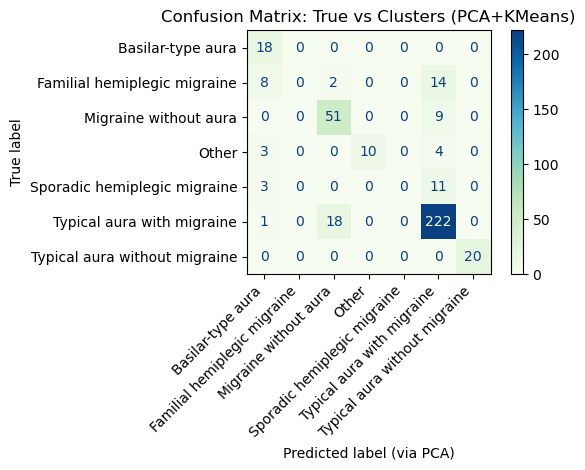

In [160]:
pca = PCA(n_components=17, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

def cluster_to_label(y_true, y_pred, n_clusters):
    labels = np.zeros_like(y_pred)
    for i in range(n_clusters):
        mask = (y_pred == i)
        if np.any(mask):
            labels[mask] = mode(y_true[mask], keepdims=False)[0]
    return labels

assigned_labels_pca = cluster_to_label(y, cluster_labels_pca, 5)
accuracy_pca = np.mean(assigned_labels_pca == y)
ari_pca = adjusted_rand_score(y, cluster_labels_pca)
nmi_pca = normalized_mutual_info_score(y, cluster_labels_pca)

print(f"PCA (17 components) Clustering Accuracy: {accuracy_pca:.3f}")
print(f"PCA (17 components) Adjusted Rand Index: {ari_pca:.3f}")
print(f"PCA (17 components) Normalized MI Score: {nmi_pca:.3f}")

cmpca = confusion_matrix(y, assigned_labels_pca)
plt.figure(figsize=(7,7))
disp = ConfusionMatrixDisplay(cmpca, display_labels=le.classes_)
disp.plot(cmap='GnBu', values_format='d')
plt.title('Confusion Matrix: True vs Clusters (PCA+KMeans)')
classes = LabelEncoder().fit(df['Type']).classes_
plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
plt.yticks(range(len(classes)), classes)
plt.xlabel('Predicted label (via PCA)')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig("Confusion Matrix Cluster_ClasePCA.png", dpi=300, bbox_inches="tight")
plt.show()